### Hotel Booking cancellation rates checking & analyzing  via Pandas / Matplotlib / Seaborn

##### Tanmoy Banerjee

### Business Problem

In recent years, City Hotel and Resort Hotel have seen high cancellation rates. Each hotel is now dealing with a number of issues as a result, including fewer revenues and less than ideal hotel room use. Consequently, lowering cancellation rates is both hotels' primary goal in order to increase their efficiency in generating revenue, and for us to offer thorough business advice to address this problem.

The analysis of hotel booking cancellations as well as other factors that have no bearing on their business and yearly revenue generation are the main topics of this report.

### Assumptions

1.	No unusual occurrences between 2015 and 2017 will have a substantial impact on the data used.
2.	The information is still current and can be used to analyze a hotel's possible plans in an efficient manner.
3.	There are no unanticipated negatives to the hotel employing any advised technique.
4.	The hotels are not currently using any of the suggested solutions.
 
5.	The biggest factor affecting the effectiveness of earning income is booking cancellations.
6.	Cancellations result in vacant rooms for the booked length of time.
7.	Clients make hotel reservations the same year they make cancellations.



##### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### Loading Dataset

In [2]:
df = pd.read_csv('H:/Hotel.csv')

In [3]:
# calling the dataset top 10 values

df.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,3/7/2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,3/7/2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,6/5/2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,22/4/2015


In [4]:
# calling bottom 5 values of dataframe

df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


##### Exploratory Data Analysis    and     Data  Cleaning

In [5]:
# statistical description of the dataframe
df.describe().round(2)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119390.00,119386.0,119390.00,119390.00,119390.00,119390.00,119390.00,103050.00,6797.00,119390.00,119390.00,119390.00,119390.00
mean,0.37,104.01,2016.16,27.17,15.80,0.93,2.50,1.86,0.1,0.01,0.03,0.09,0.14,0.22,86.69,189.27,2.32,101.83,0.06,0.57
std,0.48,106.86,0.71,13.61,8.78,1.00,1.91,0.58,0.4,0.10,0.18,0.84,1.50,0.65,110.77,131.66,17.59,50.54,0.25,0.79
min,0.00,0.00,2015.00,1.00,1.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,1.00,6.00,0.00,-6.38,0.00,0.00
25%,0.00,18.00,2016.00,16.00,8.00,0.00,1.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,9.00,62.00,0.00,69.29,0.00,0.00
50%,0.00,69.00,2016.00,28.00,16.00,1.00,2.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,14.00,179.00,0.00,94.58,0.00,0.00
75%,1.00,160.00,2017.00,38.00,23.00,2.00,3.00,2.00,0.0,0.00,0.00,0.00,0.00,0.00,229.00,270.00,0.00,126.00,0.00,1.00
max,1.00,737.00,2017.00,53.00,31.00,19.00,50.00,55.00,10.0,10.00,1.00,26.00,72.00,21.00,535.00,543.00,391.00,5400.00,8.00,5.00


In [6]:
# shape of the dataframe (row's / columns)

df.shape

(119390, 32)

In [7]:
# datatype checking 

df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [8]:
# general information about the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [9]:
# is there are null values present in dataframe

df.isnull()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,True,True,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119386,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119387,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
119388,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [10]:
# basically checked null values count column wise

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<AxesSubplot:>

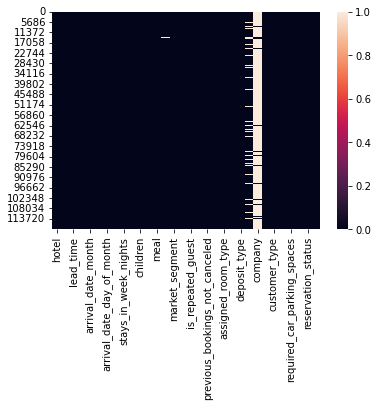

In [11]:
# showing heatmap of null values in the dataframe

sns.heatmap(df.isnull())

In [12]:
# checking is there are any duplicated values

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119385    False
119386    False
119387    False
119388    False
119389    False
Length: 119390, dtype: bool

In [13]:
# now the count of duplicated values

df.duplicated().sum()

31994

In [14]:
# showing the columns name

df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [15]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015


In [16]:
# make a proper data-time on reservation_status_date

df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [17]:
# its changed to proper datetime

df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-01-07


In [18]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [19]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [ ]:
# as we can see agent and compan has the max no of null values so we want to drop those & make a new dataframe

df.drop(['agent','company'],axis=1,inplace = True)
df.dropna(inplace=True)

In [24]:
# now as we can see now agent,company columns are dropped and now datframe doesn't have any null values present in it

df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

<AxesSubplot:>

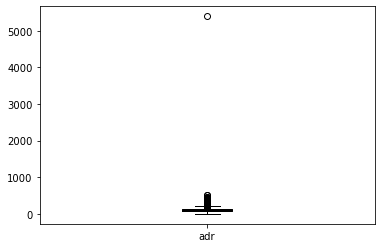

In [25]:
df['adr'].plot(kind='box',color='black')

### Research Question

1.	What are the variables that affect hotel reservation cancellations?
2.	How can we make hotel reservations cancellations better?
3.	How will hotels be assisted in making pricing and promotional decisions?


##### Analysis & Visualization

0    0.628648
1    0.371352
Name: is_canceled, dtype: float64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='is_canceled', ylabel='count'>

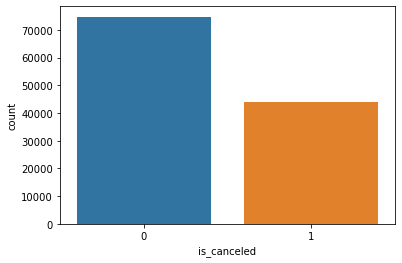

In [29]:
cancelled_perc = df['is_canceled'].value_counts(normalize=True)
print(cancelled_perc)
sns.countplot(df['is_canceled'])

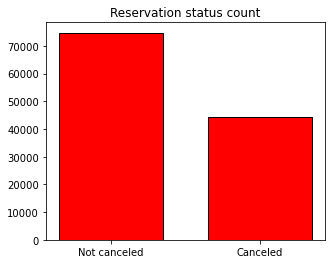

In [30]:
plt.figure(figsize=(5,4))
plt.title('Reservation status count')
plt.bar(['Not canceled','Canceled'],df['is_canceled'].value_counts(),edgecolor='k',width=0.7,color='red')
plt.show()

##### The accompanying bar graph shows the percentage of reservations that are canceled and those that are not. It is obvious that there are still a significant number of reservations that have not been canceled. There are still 37% of clients who canceled their reservation, which has a significant impact on the hotels' earnings.

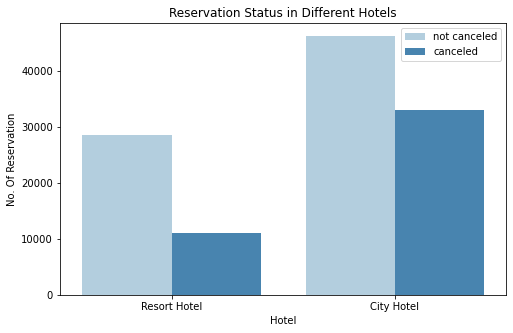

In [36]:
plt.figure(figsize=(8,5))
ax1=sns.countplot(x='hotel',hue='is_canceled',data=df,palette='Blues')
#legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title("Reservation Status in Different Hotels")
plt.xlabel('Hotel')
plt.ylabel('No. Of Reservation')
plt.legend(['not canceled','canceled'])
plt.show()

##### In comparison to resort hotels, city hotels have more bookings. It's possible that resort hotels are more expensive than those in cities.

In [48]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [46]:
city_hotel = df[df['hotel']== 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582911
1    0.417089
Name: is_canceled, dtype: float64

In [50]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

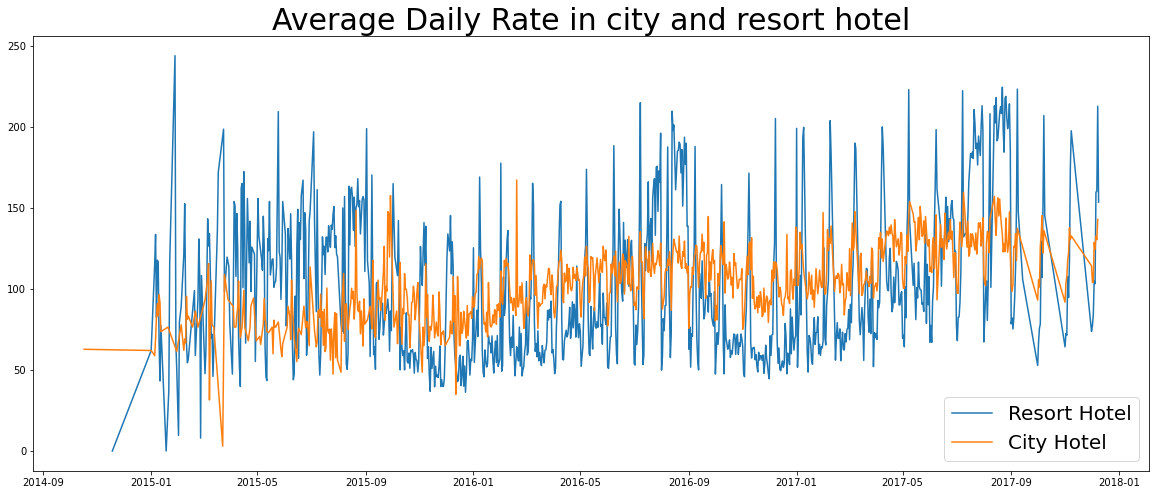

In [51]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in city and resort hotel',fontsize = 30)
plt.plot(resort_hotel.index,resort_hotel['adr'],label = 'Resort Hotel')
plt.plot(city_hotel.index,city_hotel['adr'],label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()

##### The line graph above shows that, on certain days, the average daily rate for a city hotel is less than that of a resort hotel, and on other days, it is even less. It goes without saying that weekends and holidays may see a rise in resort hotel rates.

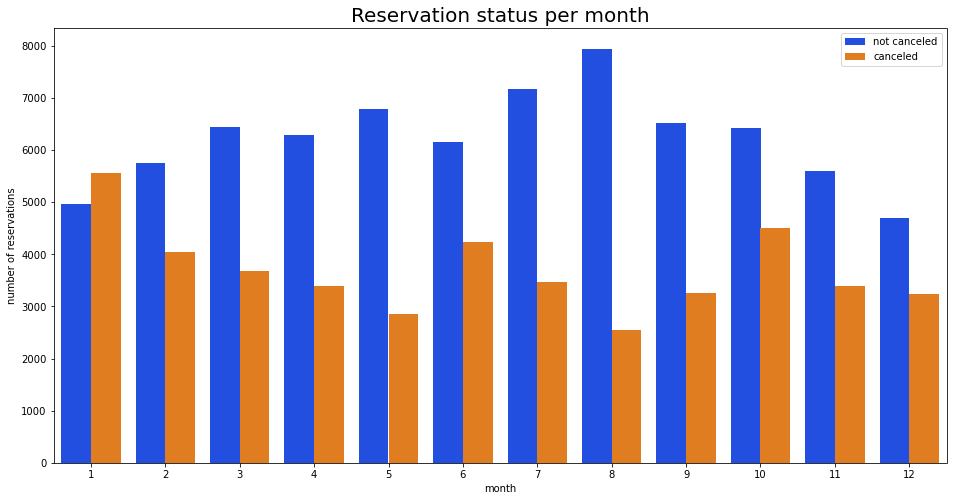

In [53]:
# reservation status month wise

df['month'] = df['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
ax1=sns.countplot(x='month',hue='is_canceled',data=df,palette='bright')
legend_labels,_ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor=(1,1))
plt.title('Reservation status per month',size=20)
plt.xlabel('month')
plt.ylabel('number of reservations')
plt.legend(['not canceled', 'canceled'])
plt.show()

##### We have developed the grouped bar graph to analyze the months with the highest and lowest reservation levels according to reservation status. As can be seen, both the number of confirmed reservations and the number of canceled reservations are largest in the month of August. whereas January is the month with the most canceled reservations

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
No handles with labels found to put in legend.


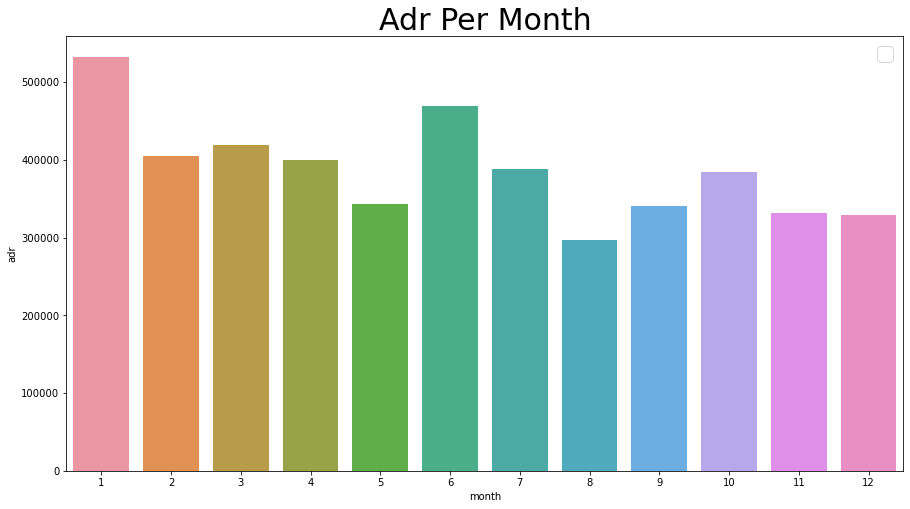

In [59]:
# adr per month

plt.figure(figsize=(15,8))
plt.title('Adr Per Month',fontsize=30)
sns.barplot('month', 'adr', data = df[df['is_canceled']== 1].groupby('month')[['adr']].sum().reset_index())
plt.legend(fontsize=20)
plt.show()

### This bar graph demonstrates that cancellations are most common when prices are greatest and are least common when they are lowest. Therefore, the cost of the accommodation is solely responsible for the cancellation.

##### Now, let's see which country has the highest reservation canceled. The top country is Portugal with the highest number of cancellations.

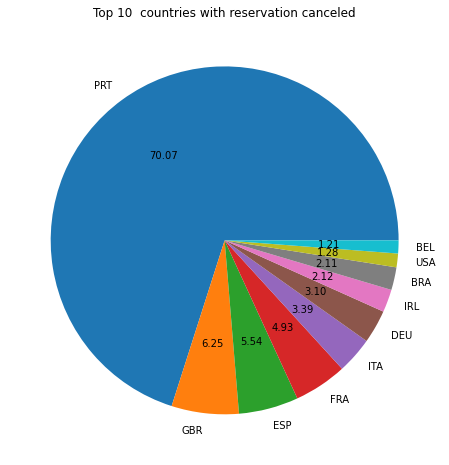

In [61]:
canceled_data = df[df['is_canceled'] == 1]
top_10_country = canceled_data['country'].value_counts()[:10]
plt.figure(figsize=(8,8))
plt.title('Top 10  countries with reservation canceled')
plt.pie(top_10_country,autopct = '%.2f',labels = top_10_country.index)
plt.show()

In [62]:
df['market_segment'].value_counts()

Online TA        56402
Offline TA/TO    24160
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: market_segment, dtype: int64

<AxesSubplot:>

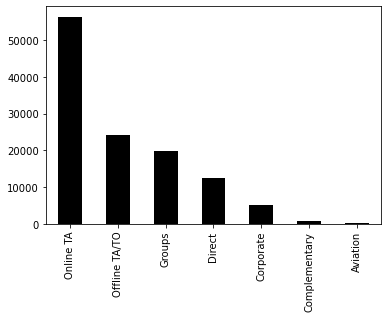

In [63]:
df['market_segment'].value_counts().plot(kind='bar',color = 'black')

In [64]:
canceled_data['market_segment'].value_counts()

Online TA        20738
Groups           12097
Offline TA/TO     8278
Direct            1920
Corporate          978
Complementary       90
Aviation            52
Name: market_segment, dtype: int64

<AxesSubplot:>

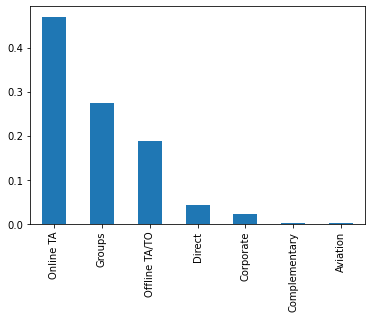

In [70]:
canceled_data['market_segment'].value_counts(normalize=True).plot(kind='bar')

##### Let’s check the area from where guests are visiting the hotels and making reservations. Is it coming from Direct or Groups, Online or Offline Travel Agents? Around 46% of the clients come from online travel agencies, whereas 27% come from groups. Only 4% of clients book hotels directly by visiting them and making reservations.

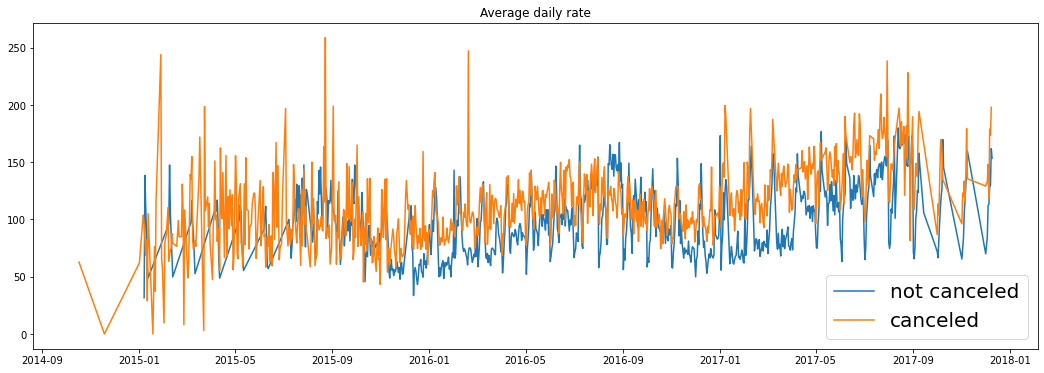

In [74]:
canceled_df_adr = canceled_data.groupby('reservation_status_date')[['adr']].mean()
canceled_df_adr.reset_index(inplace=True)
canceled_df_adr.sort_values('reservation_status_date',inplace=True)

not_canceled_data = df[df['is_canceled']== 0]
not_canceled_df_adr = not_canceled_data.groupby('reservation_status_date')[['adr']].mean()
not_canceled_df_adr.reset_index(inplace = True)
not_canceled_df_adr.sort_values('reservation_status_date',inplace = True)

plt.figure(figsize=(18,6))
plt.title('Average daily rate')
plt.plot(not_canceled_df_adr['reservation_status_date'],not_canceled_df_adr['adr'], label = 'not canceled')
plt.plot(canceled_df_adr['reservation_status_date'],canceled_df_adr['adr'], label = 'canceled')
plt.legend(fontsize = 20)
plt.show()

##### As seen in the graph, reservations are canceled when the average daily rate is higher than when it is not canceled. It clearly proves all the above analysis, that the higher price leads to higher cancellation.


### ## Suggestions

1.	Cancellation rates rise as the price does. In order to prevent cancellations of reservations, hotels could work on their pricing strategies and try to lower the rates for specific hotels based on locations. They can also provide some discounts to the consumers.

2.	As the ratio of the cancellation and not cancellation of the resort hotel is higher in the resort hotel than the city hotels. So the hotels should provide a reasonable discount on the room prices on weekends or on holidays.

3.	In the month of January, hotels can start campaigns or marketing with a reasonable amount to increase their revenue as the cancellation is the highest in this month.

4.	They can also increase the quality of their hotels and their services mainly in Portugal to reduce the cancellation rate.
